In [65]:
# CNN classificatiion for text classification  


#tfidf+wavelet
#tfidf
#w2v        

In [66]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import os
from textblob import TextBlob


In [67]:
import tensorflow as tf

In [68]:
# import libraries for text processing
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import demoji

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [69]:
# read data btc_tweets.csv
df = pd.read_csv('btc_tweets.csv')
df = df.iloc[0:70000]
df.head()
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'btc_tweets.csv'

In [ ]:
spam_words = ['btc', 'eth', 'xrp', 'ltc', 'bch', 'eos', 'bnb', 'xtz', 'ada', 'xlm',
                    'trx', 'usdt', 'link', 'xmr', 'leo', 'miota', 'tusd', 'neo', 'xem',
                    'xvg', 'btmx', 'bsv', 'vet', 'ht', 'dcr', 'pax', 'bat', 'cro', 'dash',
                    'oxt', 'zec', 'lend', 'hbar', 'mkr', 'wtc', 'xzc', 'yfi', 'dai', 'btg',
                    'atom', 'qnt', 'cvc', 'doge', 'paxg', 'link', 'usdc', 'grt', 'rvn', 'iost','sol','algo','luna','solana','algorand','lunacoin','shin','matic',
                    'mdt', 'ftt', 'bcd', 'dgb', 'bnt', 'bat', 'tomo', 'tfuel', 'tnt', 'tmtg',
                    'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt',
                    'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt', 'tct', 'tachain', 'tmt','bitcoin', 'ethereum', 'ripple', 'litecoin', 'bitcoin cash', 'eos', 'binance coin', 'tezos', 'cardano', 'stellar',
                    'tron', 'tether', 'chainlink', 'monero', 'unus sed leo', 'iota', 'trueusd', 'neo', 'nem',
                    'verge', 'bitmax', 'bitcoin sv', 'vechain', 'huobi token', 'decred', 'paxos standard', 'basic attention token', 'crypto.com', 'dash',
                    'orchid', 'zcash', 'ethlend', 'hbar', 'maker', 'waltonchain', 'zcoin', 'yearn.finance', 'dai', 'bitcoin gold',
                    'cosmos', 'quant', 'civic', 'dogecoin', 'pax gold', 'chainlink', 'usd coin', 'graph', 'ravencoin', 'iostoken',
                    'measurable data token', 'ftx token', 'bitcoin diamond', 'digibyte', 'bancor', 'basic attention token', 'tomochain', 'theta fuel', 'tierion', 'timeless protocol',
                    'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank',
                    'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank', 'time new bank', 'tachain', 'timenewbank','cspr']
set(spam_words)
stop_words = set(stopwords.words('english'))

In [ ]:
# clean Tweet column and replace emojis with text description and remove set of spam words
def CleanTXT(text):
    text = str(text)
    text = text.lower() # text lowered
    
    text = demoji.replace_with_desc(text,"") # emojis replaced with desc
    
    text = text.replace('\n','') # remove \n
    
    text = text.replace("$","") # remove $
    
    text = re.sub(r'@\w+|\#','',text) # remove hashtags and @ mentions 
    
    text= text.translate(str.maketrans("","",string.punctuation)) #punctuation removed
    
    #https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
    text = re.sub(r"http\s+|www\S+|https\S+","",text,flags=re.MULTILINE) # remove link 
    
    #filtering stopwords
    filtered_words = [word for word in TextBlob(text).words if word not in stop_words]
    
    #filtering spamwords
    filtered_words = [word for word in filtered_words if word not in spam_words]
    
    #lemmatization
    lemmatized_words = [word.lemmatize('v') for word in filtered_words]
    
    
    return " ".join(lemmatized_words)

# clean Tweet column
df['Clean_Tweet'] = df["Tweet"].map(CleanTXT)


In [ ]:
print(df.shape)
df=df[df["Clean_Tweet"]!=""]
df=df[df["Clean_Tweet"]!=" "]
df=df[df["Clean_Tweet"]!="nan"]
df.reset_index(drop=True,inplace=True)
print(df.shape)

(70000, 5)
(69823, 5)


In [ ]:
print(df.shape)
df["Clean_Tweet"].drop_duplicates(inplace=True)
print(df.shape)

(69823, 5)
(69823, 5)


In [ ]:
df=pd.read_pickle('preprocessed.pkl')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yigitagalar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def polarity_score(compound):
    if compound > 0.05:
        return int(1)
    elif compound < -0.05:
        return int(-1)
    elif compound >= -0.05 and compound <= 0.05:
        return (0)

In [ ]:
vader_scores_clean = df['Clean_Tweet'].apply(lambda txt: sia.polarity_scores(txt))
vader_scoring_df_clean = pd.DataFrame().from_records(vader_scores_clean)
df["sentiment"]=vader_scoring_df_clean["compound"].apply(polarity_score)
del vader_scoring_df_clean

In [ ]:
df.head()

,Unnamed: 0,Date,User,Tweet,Clean_Tweet,sentiment
0,0,2023-01-04 23:59:47+00:00,Dodococogoat,We had 3 Asian session pumps in a row from $BT...,3 asian session pump row roll floor laugh cont...,1
1,1,2023-01-04 23:58:38+00:00,DiegoXavvi,"Wow 🤩, @allianceblock Nexera has Onramper. \nT...",wow starstruck nexera onramper game changer de...,1
2,2,2023-01-04 23:58:11+00:00,apes_mixup,"$BTC will shock every one, for the good reason...",shock every one good reason,1
3,4,2023-01-04 23:57:50+00:00,boomtimecrypto,How much better can it get in crypto - ask you...,much better get crypto ask thismeme slideshow ...,1
4,5,2023-01-04 23:57:49+00:00,Matt_O_Mart,"Sometimes, I still log in just to look at ""Cel...",sometimes still log look celsiuss money neutra...,0


In [ ]:
df["sentiment"].to_csv("sentiments.csv")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_vector=vectorizer.fit_transform(df["Clean_Tweet"])
#tfidf_array = tfidf_vector.toarray()

In [ ]:
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, df["sentiment"], test_size=0.2, random_state=42)
#10% validation split of test
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=42)

In [ ]:
#change xtrain xtest xval to array
X_train=X_train.toarray()
X_test=X_test.toarray()
X_val=X_val.toarray()

#change ytrain ytest yval to array
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_val=y_val.to_numpy()

In [ ]:
#reshape x and y for training, testing and validation convolutional neural network
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
y_train=y_train.reshape(y_train.shape[0],1)

X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_test=y_test.reshape(y_test.shape[0],1)

X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],1)
y_val=y_val.reshape(y_val.shape[0],1)


ValueError: cannot reshape array of size 167574 into shape (55858,1)

In [ ]:
#import tensorflow keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D , Input
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#make y_train, y_test and y_val one hot encoded
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=3)
y_test = to_categorical(y_test,num_classes=3)
y_val = to_categorical(y_val,num_classes=3)

In [ ]:
#shapes of  y_test, X_val, y_val
print(y_test.shape)
print(y_val.shape)
print(y_train.shape)

(6982, 3)
(6983, 3)
(55858, 3)


In [ ]:
#pickle out X_test and y_test
import pickle
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)
#with open('y_test.pkl', 'wb') as f:
#    pickle.dump(y_test, f)
    

In [ ]:
#build model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 89695, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29898, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 956736)            0         
                                                                 
 dropout (Dropout)           (None, 956736)            0         
                                                                 
 dense (Dense)               (None, 8)                 7653896   
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                        

In [ ]:
#how to put early stopping in keras
#https://stackoverflow.com/questions/43178668/how-to-put-early-stopping-in-keras

early_stopping = EarlyStopping(monitor='val_loss', verbose=1 ,patience=1, mode='min')

#train model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=3,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/3


2023-02-02 06:00:04.657797: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


437/437 [==============================] - 467s 1s/step - loss: 0.5160 - accuracy: 0.7885 - val_loss: 0.3018 - val_accuracy: 0.8826
Epoch 2/3
437/437 [==============================] - 515s 1s/step - loss: 0.2368 - accuracy: 0.9149 - val_loss: 0.2401 - val_accuracy: 0.9091
Epoch 3/3
437/437 [==============================] - 520s 1s/step - loss: 0.1809 - accuracy: 0.9366 - val_loss: 0.2216 - val_accuracy: 0.9191


In [ ]:
history.history

{'loss': [0.5159991979598999, 0.23683543503284454, 0.1809103786945343],
 'accuracy': [0.7885172963142395, 0.9148555397987366, 0.9366071224212646],
 'val_loss': [0.3018108606338501, 0.2401273101568222, 0.22155362367630005],
 'val_accuracy': [0.8826056122779846, 0.9090909361839294, 0.9191123843193054]}

In [ ]:
model.evaluate(X_test, y_test)

#todo:
#sentiment analiz için hem tfidf hem de wavelet için daha kompleks bir model geliştirmek gerekiyor.
#transformersdan çıkan sonuçları tekrar bir transformers modeline sokmak gerekiyor.
# 

393/393 [==============================] - 23s 59ms/step - loss: 0.2005 - accuracy: 0.9334


[0.20052196085453033, 0.9334022998809814]

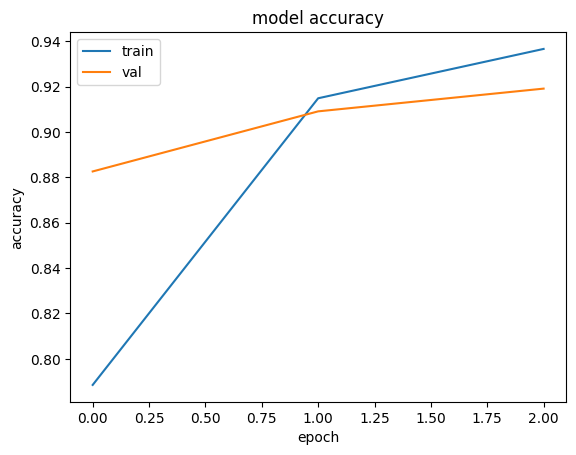

In [ ]:

#plot accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

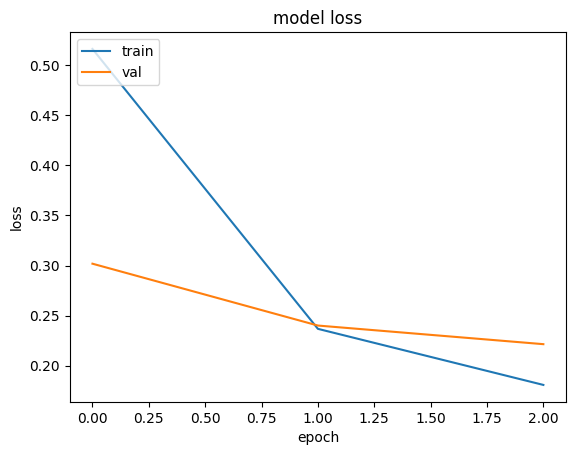

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()




In [ ]:
model.evaluate(X_test, y_test, verbose=1)

NameError: name 'X_test' is not defined

In [ ]:
model.save('tfidfmodel')

INFO:tensorflow:Assets written to: tfidfmodel/assets


INFO:tensorflow:Assets written to: tfidfmodel/assets


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("tfidfmodel")

In [ ]:
pd.DataFrame(model.predict(tfidf_vector.toarray()),columns=["tfidf_neg_clean","tfidf_neu_clean","tfidf_pos_clean"]).to_csv("sentiment_tfidf.csv")

2023-02-02 06:45:39.744887: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2182/2182 [==============================] - 135s 62ms/step


In [ ]:
import joblib

In [ ]:
coeffs = joblib.load('coeflist.pkl')
#make coeffs to np array
coeffs=np.array(coeffs)

In [ ]:
len(coeffs)

69823

In [ ]:
from sklearn.model_selection import train_test_split
#train test split for coeffs wv
Wv_train, Wv_test, y_train, y_test = train_test_split(coeffs, df["sentiment"], test_size=0.2, random_state=42)
#10% validation split of test
Wv_test, Wv_val, y_test, y_val = train_test_split(Wv_test, y_test, test_size=0.5, random_state=42)

In [ ]:


#change ytrain ytest yval to array
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_val=y_val.to_numpy()

#reshape x and y for training, testing and validation convolutional neural network
Wv_train=Wv_train.reshape(Wv_train.shape[0],Wv_train.shape[1],1)
y_train=y_train.reshape(y_train.shape[0],1)

Wv_test=Wv_test.reshape(Wv_test.shape[0],Wv_test.shape[1],1)
y_test=y_test.reshape(y_test.shape[0],1)

Wv_val=Wv_val.reshape(Wv_val.shape[0],Wv_val.shape[1],1)
y_val=y_val.reshape(y_val.shape[0],1)


In [ ]:

print(Wv_test.shape)
print(Wv_val.shape)
print(Wv_train.shape)



(6982, 44849, 1)
(6983, 44849, 1)
(55858, 44849, 1)


In [ ]:
Wv_test[]

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float16)

In [ ]:
#make y_train, y_test and y_val one hot encoded
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=3)
y_test = to_categorical(y_test,num_classes=3)
y_val = to_categorical(y_val,num_classes=3)

In [ ]:
#pickle out X_test and y_test
import pickle
with open('Wv_test.pkl', 'wb') as f:
    pickle.dump(Wv_test, f)
with open('wvy_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)


In [ ]:


#build model
modelwv2 = Sequential()
modelwv2.add(Conv1D(128, 1, activation='relu', input_shape=(1,Wv_train.shape[1])))
modelwv2.add(MaxPooling1D(1))
modelwv2.add(Conv1D(64, 1, activation='relu'))
modelwv2.add(Flatten())
modelwv2.add(Dropout(0.8))
modelwv2.add(Dense(8, activation='relu'))
modelwv2.add(Dense(3, activation='softmax'))

modelwv2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

modelwv2.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 1, 128)            5740800   
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 64)             8256      
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                      

In [73]:
y_train.shape

(55858, 3)

In [74]:
Wv_train.shape

(55858, 44849, 1)

In [71]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1 ,patience=1, mode='min')
#train model
historywv2 = modelwv2.fit([Wv_train[0],Wv_train[2],Wv_train[1]], y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=([Wv_val[0],Wv_val[2],Wv_val[1]], y_val),
                    verbose=1,
                    callbacks=[early_stopping])



ValueError: Data cardinality is ambiguous:
  x sizes: 44849, 44849
  y sizes: 55858
Make sure all arrays contain the same number of samples.

In [29]:


#build model
modelwv = Sequential()
modelwv.add(Conv1D(32, 3, activation='relu', input_shape=(Wv_train.shape[1],1)))
modelwv.add(MaxPooling1D(3))
modelwv.add(Flatten())
modelwv.add(Dropout(0.8))
modelwv.add(Dense(8, activation='relu'))
modelwv.add(Dense(3, activation='softmax'))

modelwv.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

modelwv.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 44847, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14949, 32)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 478368)            0         
                                                                 
 dropout (Dropout)           (None, 478368)            0         
                                                                 
 dense (Dense)               (None, 8)                 3826952   
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                        

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1 ,patience=1, mode='min')
#train model
historywv = modelwv.fit(Wv_train, y_train,
                    batch_size=128,
                    epochs=3,
                    validation_data=(Wv_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])


Epoch 1/3
437/437 [==============================] - 231s 527ms/step - loss: 0.8838 - accuracy: 0.6734 - val_loss: 0.6725 - val_accuracy: 0.8017
Epoch 2/3
437/437 [==============================] - 259s 592ms/step - loss: 0.4858 - accuracy: 0.8178 - val_loss: 0.3213 - val_accuracy: 0.8829
Epoch 3/3
437/437 [==============================] - 276s 631ms/step - loss: 0.2736 - accuracy: 0.9026 - val_loss: 0.2654 - val_accuracy: 0.9126


In [45]:
historywv

NameError: name 'historywv' is not defined

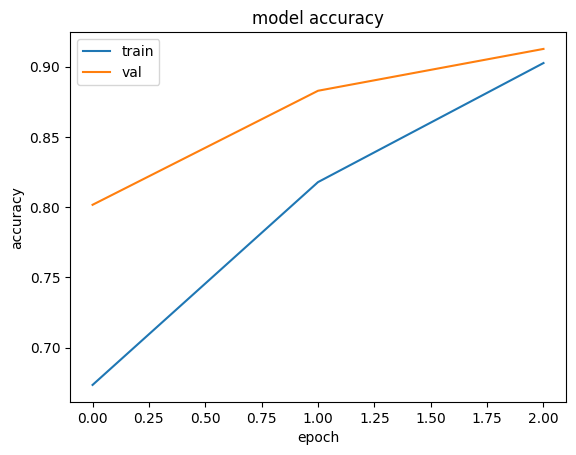

In [34]:

#plot accuracy 
plt.plot(historywv.history['accuracy'])
plt.plot(historywv.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

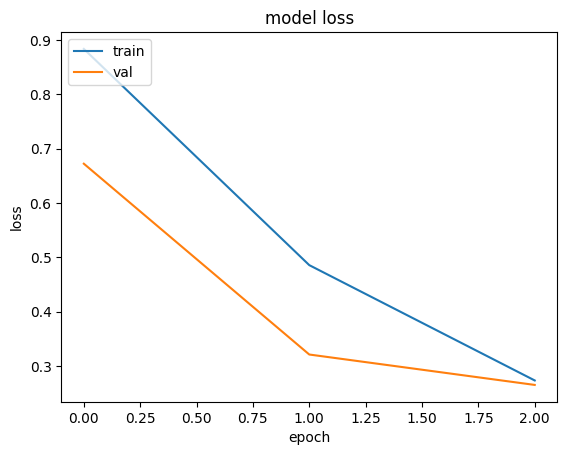

In [33]:

plt.plot(historywv.history['loss'])
plt.plot(historywv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()




In [46]:
from tensorflow.keras.models import load_model
modelwv = load_model("models/wvmodel")

In [47]:
modelwv.evaluate(Wv_test, y_test, verbose=2)

2023-02-02 10:35:03.121301: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


219/219 - 7s - loss: 0.2488 - accuracy: 0.9139 - 7s/epoch - 30ms/step


[0.2488248348236084, 0.9139215350151062]

In [7]:
coeffs=coeffs.reshape(coeffs.shape[0],coeffs.shape[1],1)

In [8]:
coeffs.shape

(69823, 44849, 1)

In [9]:
pd.DataFrame(modelwv.predict(coeffs),columns=["wv_neg_clean","wv_neu_clean","wv_pos_clean"]).to_csv("sentiment_wv.csv")

   1/2182 [..............................] - ETA: 4:56

2023-02-02 07:20:35.299529: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2182/2182 [==============================] - 70s 32ms/step


In [36]:
modelwv.save("wvmodel")

INFO:tensorflow:Assets written to: wvmodel/assets


INFO:tensorflow:Assets written to: wvmodel/assets


# WORD2VEC EMBEDDINGS

In [72]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


In [75]:
df=pd.read_pickle("preprocessed.pkl")

In [82]:
cbow_vectors = gensim.models.Word2Vec(df['Clean_Tweet'],vector_size=300,window=3, min_count=2)
cbow_vectors.train(df['Clean_Tweet'],total_examples=len(df['Clean_Tweet']),epochs=30)


(41900426, 202191090)

In [83]:
#create clean_tweet tokenized column
df['Clean_Tweet_Tokenized'] = df['Clean_Tweet'].apply(lambda x: x.split())

In [85]:
#creating vectors for each tweet
words = set(cbow_vectors.wv.index_to_key )
df['Text_vect'] = np.array([np.array([cbow_vectors.wv[i] for i in ls if i in words])
                         for ls in df['Clean_Tweet_Tokenized']])



/var/folders/pj/_k55qbhj39dcrl55zbnt5z7h0000gn/T/ipykernel_90727/2890085495.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df['Text_vect'] = np.array([np.array([cbow_vectors.wv[i] for i in ls if i in words])


In [88]:
#creating same sized vectors for each tweet
vector_size_n = 300
text_vect_avg = []
for v in df['Text_vect']:
    if v.size:
        text_vect_avg.append(v.mean(axis=0))
    else:
        text_vect_avg.append(np.zeros(vector_size_n, dtype=float)) # the same vector size must be used here as for model training
        
        
df['Text_vect_avg'] = text_vect_avg

In [95]:
#create numpy array from text_vect_avg column
text_vect_avg=np.array(df['Text_vect_avg'].tolist())


In [97]:
#split data into training, testing and validation without train_test_split
w2v_train = text_vect_avg[:int(text_vect_avg.shape[0]*0.8)]
w2v_test = text_vect_avg[int(text_vect_avg.shape[0]*0.8):int(text_vect_avg.shape[0]*0.9)]
w2v_val = text_vect_avg[int(text_vect_avg.shape[0]*0.9):]


In [98]:
#reshape x and y for training, testing and validation convolutional neural network
w2v_train=w2v_train.reshape(w2v_train.shape[0],w2v_train.shape[1],1)
w2v_test=w2v_test.reshape(w2v_test.shape[0],w2v_test.shape[1],1)
w2v_val=w2v_val.reshape(w2v_val.shape[0],w2v_val.shape[1],1)

In [56]:
w2v_val[:3]

NameError: name 'w2v_val' is not defined

In [102]:


#build model
modelw2vdeneme = Sequential()
modelw2vdeneme.add(Conv1D(16, 3, activation='relu', input_shape=(w2v_train.shape[1],1)))
modelw2vdeneme.add(MaxPooling1D(3))
modelw2vdeneme.add(Flatten())
modelw2vdeneme.add(Dense(4, activation='relu'))
modelw2vdeneme.add(Dense(3, activation='softmax'))

modelw2vdeneme.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

modelw2vdeneme.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 298, 16)           64        
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 99, 16)           0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 1584)              0         
                                                                 
 dense_18 (Dense)            (None, 4)                 6340      
                                                                 
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
Total params: 6,419
Trainable params: 6,419
Non-trainable params: 0
____________________________________________________

In [103]:
#train model
historyw2v = modelw2vdeneme.fit(w2v_train, y_train,
                    batch_size=128,
                    epochs=3,
                    validation_data=(w2v_val, y_val))


Epoch 1/3
437/437 [==============================] - 2s 3ms/step - loss: 0.9671 - accuracy: 0.5271 - val_loss: 0.9473 - val_accuracy: 0.5403
Epoch 2/3
437/437 [==============================] - 1s 3ms/step - loss: 0.9456 - accuracy: 0.5530 - val_loss: 0.9385 - val_accuracy: 0.5432
Epoch 3/3
437/437 [==============================] - 1s 3ms/step - loss: 0.9430 - accuracy: 0.5544 - val_loss: 0.9365 - val_accuracy: 0.5385


In [104]:
modelw2vdeneme.evaluate(w2v_test,y_test)

219/219 [==============================] - 0s 750us/step - loss: 0.9659 - accuracy: 0.5275


[0.9659247398376465, 0.527499258518219]

In [35]:
y_pred.shape

(6982, 3)

In [38]:
y_pred

array([[0.47210345, 0.46506333, 0.0628332 ],
       [0.23492755, 0.6801276 , 0.0849448 ],
       [0.5997001 , 0.30878103, 0.09151892],
       ...,
       [0.7522134 , 0.16270538, 0.08508124],
       [0.7120504 , 0.22910105, 0.05884856],
       [0.25090465, 0.6587722 , 0.09032318]], dtype=float32)

In [101]:
y_pred[1]

array([1.], dtype=float32)

In [92]:
y_pred.value_counts()

1.0    6982
dtype: int64